In [ ]:
import pandas as pd

df = pd.read_csv('DailyDelhiClimateTrain.csv')

def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.rename(columns={c: rename_col(c) for c in df.columns}, inplace=True)
df.head()

,Date,Meantemp,Humidity,Wind_Speed,Meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
# Parse date and add calendar fields
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df.columns

Index(['Date', 'Meantemp', 'Humidity', 'Wind_Speed', 'Meanpressure', 'Year',
       'Month'],
      dtype='object')

# Overall summary statistics
**What is the overall summary of climate variables (mean, median, min, max)?**

In [3]:
df.describe()

,Date,Meantemp,Humidity,Wind_Speed,Meanpressure,Year,Month
count,1462,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548,2014.502736,6.519152
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667,2013.000000,1.000000
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357,2014.000000,4.000000
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492,2015.000000,7.000000
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901,2016.000000,10.000000
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333,2017.000000,12.000000
std,NaN,7.348103,16.769652,4.561602,180.231668,1.120248,3.451727


# !Monthly Mean Temperature Across Years
**How does the average monthly mean temperature vary across years?**

Year    2013   2014   2015   2016  2017
Month                                  
1      12.07  13.43  12.71  15.14  10.0
2      16.87  15.75  18.79  19.03   NaN
3      22.81  21.59  21.55  25.70   NaN
4      28.90  28.06  28.00  32.55   NaN
5      33.78  31.41  33.35  34.73   NaN
6      32.48  34.77  32.74  34.95   NaN
7      30.66  32.03  30.41  30.88   NaN
8      29.55  31.41  30.33  31.12   NaN
9      29.84  29.76  30.65  31.48   NaN
10     26.13  26.50  26.87  28.96   NaN
11     18.81  20.10  20.75  22.96   NaN
12     15.18  14.82  14.99  17.67   NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<Axes: xlabel='Month'>

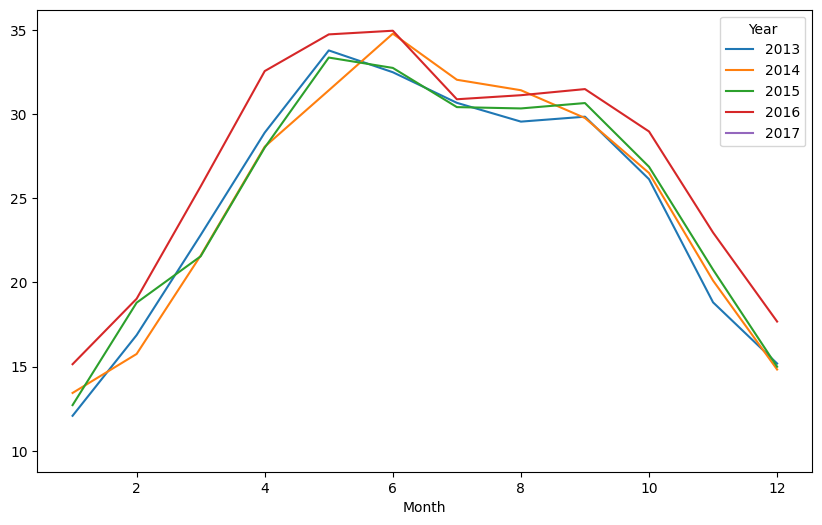

In [4]:
q2_monthly_temp = df.groupby(["Year", "Month"])["Meantemp"].mean().unstack("Year")
print(q2_monthly_temp.round(2).to_string())
q2_monthly_temp.plot(figsize=(10, 6))

# Yearly trend of average humidity
**What is the yearly trend of humidity in Delhi?**

Year
2013     63.05
2014     59.77
2015     61.43
2016     58.74
2017    100.00


<Axes: xlabel='Year'>

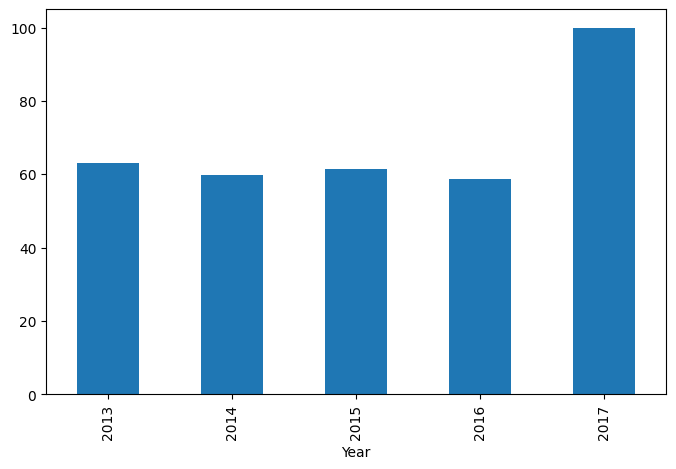

In [5]:
q3_yearly_humidity = df.groupby("Year")["Humidity"].mean()
print(q3_yearly_humidity.round(2).to_string())

q3_yearly_humidity.plot(kind="bar", figsize=(8, 5))

# Relationship between temperature and humidity
**Is there any noticeable relationship between temperature and humidity?**

    Meantemp   Humidity
0  10.000000  84.500000
1   7.400000  92.000000
2   7.166667  87.000000
3   8.666667  71.333333
4   6.000000  86.833333
5   7.000000  82.800000
6   7.000000  78.600000
7   8.857143  63.714286
8  14.000000  51.250000
9  11.000000  62.000000


<Axes: xlabel='Meantemp', ylabel='Humidity'>

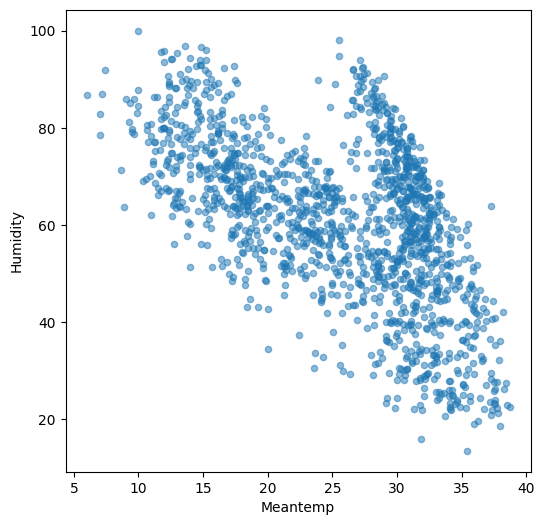

In [6]:
q4_temp_humidity = df[["Meantemp", "Humidity"]]
print(q4_temp_humidity.head(10).to_string())

df.plot(x="Meantemp", y="Humidity", kind="scatter", figsize=(6, 6), alpha=0.5)


# Seasonal (monthly) variation of wind speed
**How does wind speed vary seasonally (month-wise)?**

Month
1     4.945
2     6.531
3     7.697
4     8.783
5     9.023
6     9.382
7     7.419
8     6.924
9     7.596
10    4.761
11    3.873
12    4.762


<Axes: xlabel='Month'>

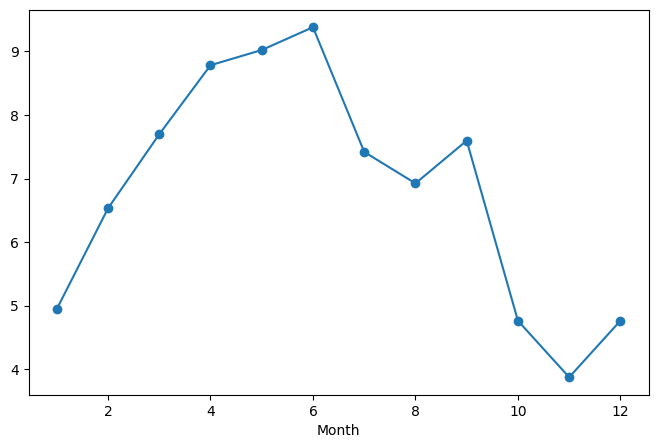

In [7]:
q5_wind_monthly = df.groupby("Month")["Wind_Speed"].mean()
print(q5_wind_monthly.round(3).to_string())

q5_wind_monthly.plot(kind="line", marker="o", figsize=(8, 5))

# Top 5 windiest days and their temperatures
**What are the top 5 windiest days and their corresponding temperatures?**

In [8]:
q6_top_wind = df.nlargest(5, "Wind_Speed")[["Date", "Wind_Speed", "Meantemp"]].sort_values("Wind_Speed", ascending=False)
print(q6_top_wind.to_string(index=False))

      Date  Wind_Speed  Meantemp
2013-09-09   42.220000 31.000000
2013-12-25   34.487500 13.666667
2015-08-19   33.325000 31.250000
2014-09-23   30.685714 31.000000
2015-01-28   27.775000 11.714286


# Yearly trend of mean atmospheric pressure
**How does mean pressure vary across different years?**

Year
2013    1007.64
2014    1008.35
2015    1008.83
2016    1019.56
2017    1016.00


<Axes: xlabel='Year'>

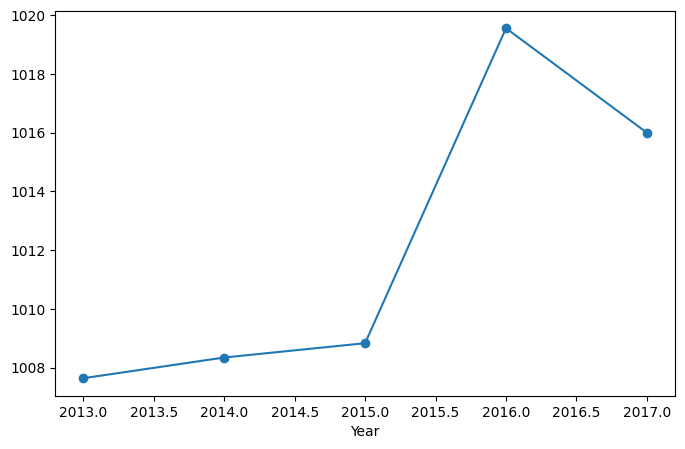

In [9]:
q7_pressure = df.groupby("Year")["Meanpressure"].mean()
print(q7_pressure.round(2).to_string())

q7_pressure.plot(kind="line", marker="o", figsize=(8, 5))

# Correlation matrix
**What is the correlation matrix of all climate variables?**

In [10]:
q8_corr = df[["Meantemp", "Humidity", "Wind_Speed", "Meanpressure"]].corr()
print(q8_corr.round(3).to_string())

              Meantemp  Humidity  Wind_Speed  Meanpressure
Meantemp         1.000    -0.572       0.306        -0.039
Humidity        -0.572     1.000      -0.374         0.002
Wind_Speed       0.306    -0.374       1.000        -0.021
Meanpressure    -0.039     0.002      -0.021         1.000


# Hottest and coldest months on average
**Which month is the hottest and coldest on average?**

Month
6     33.73
5     33.32
7     31.00
8     30.60
9     30.43
4     29.38
10    27.11
3     22.91
11    20.66
2     17.62
12    15.67
1     13.31


<Axes: xlabel='Month'>

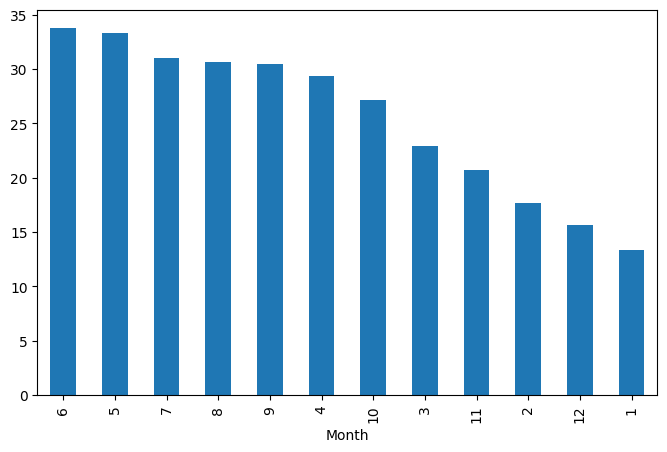

In [11]:
q9_monthly_temp = df.groupby("Month")["Meantemp"].mean().sort_values(ascending=False)
print(q9_monthly_temp.round(2).to_string())

q9_monthly_temp.plot(kind="bar", figsize=(8, 5))

# Pivot table: Temperature & Humidity by Month (mean)
**How do temperature and humidity jointly vary across months (pivot table)?**

In [12]:
q10_pivot = df.pivot_table(index="Month", values=["Meantemp", "Humidity"], aggfunc="mean")
print(q10_pivot.round(2).to_string())

       Humidity  Meantemp
Month                    
1         78.60     13.31
2         67.96     17.62
3         60.70     22.91
4         39.04     29.38
5         35.74     33.32
6         50.63     33.73
7         70.63     31.00
8         70.47     30.60
9         60.72     30.43
10        61.22     27.11
11        60.61     20.66
12        72.39     15.67
